In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pywaffle import Waffle
import missingno as msno


In [2]:
features = pd.read_csv("C:/Users/FPTSHOP/OneDrive/Documents/Project - DAP301m/app-starter-kit/walmart-recruiting-store-sales-forecasting/features.csv")
stores = pd.read_csv("C:/Users/FPTSHOP/OneDrive/Documents/Project - DAP301m/app-starter-kit/walmart-recruiting-store-sales-forecasting/stores.csv")
test = pd.read_csv("C:/Users/FPTSHOP/OneDrive/Documents/Project - DAP301m/app-starter-kit/walmart-recruiting-store-sales-forecasting/test.csv")
train = pd.read_csv("C:/Users/FPTSHOP/OneDrive/Documents/Project - DAP301m/app-starter-kit/walmart-recruiting-store-sales-forecasting/train.csv")


In [3]:
feature_store = features.merge(stores, how='inner', on = "Store")
train_df = train.merge(feature_store, how='inner', on = ['Store','Date','IsHoliday']).sort_values(by=['Store','Dept','Date']).reset_index(drop=True)
test_df = test.merge(feature_store, how='inner', on = ['Store','Date','IsHoliday']).sort_values(by = ['Store','Dept','Date']).reset_index(drop=True)

In [4]:
train_df = train.merge(feature_store, how='inner', on = ['Store','Date','IsHoliday']).sort_values(by=['Store','Dept','Date']).reset_index(drop=True)
test_df = test.merge(feature_store, how='inner', on = ['Store','Date','IsHoliday']).sort_values(by = ['Store','Dept','Date']).reset_index(drop=True)

In [5]:
train_df['Date'] = pd.to_datetime(train_df['Date'])
train_df['Year'] = pd.to_datetime(train_df['Date']).dt.year
train_df['Month'] = pd.to_datetime(train_df['Date']).dt.month
train_df['Week'] = pd.to_datetime(train_df['Date']).dt.isocalendar().week
train_df['Day'] = pd.to_datetime(train_df['Date']).dt.day

test_df['Date'] = pd.to_datetime(test_df['Date'])
test_df['Year'] = pd.to_datetime(test_df['Date']).dt.year
test_df['Month'] = pd.to_datetime(test_df['Date']).dt.month
test_df['Week'] = pd.to_datetime(test_df['Date']).dt.isocalendar().week
test_df['Day'] = pd.to_datetime(test_df['Date']).dt.day


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Temperature   421570 non-null  float64       
 6   Fuel_Price    421570 non-null  float64       
 7   MarkDown1     150681 non-null  float64       
 8   MarkDown2     111248 non-null  float64       
 9   MarkDown3     137091 non-null  float64       
 10  MarkDown4     134967 non-null  float64       
 11  MarkDown5     151432 non-null  float64       
 12  CPI           421570 non-null  float64       
 13  Unemployment  421570 non-null  float64       
 14  Type          421570 non-null  object        
 15  Size          421

In [7]:
train_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Year,Month,Week,Day
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,2010,2,5,5
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315,2010,2,6,12
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315,2010,2,7,19
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315,2010,2,8,26
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315,2010,3,9,5


In [8]:
data_train = train_df.copy()
data_test = test_df.copy()


In [9]:
data_train

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Year,Month,Week,Day
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,2010,2,5,5
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315,2010,2,6,12
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315,2010,2,7,19
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315,2010,2,8,26
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315,2010,3,9,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,B,118221,2012,9,39,28
421566,45,98,2012-10-05,628.10,False,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667,B,118221,2012,10,40,5
421567,45,98,2012-10-12,1061.02,False,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667,B,118221,2012,10,41,12
421568,45,98,2012-10-19,760.01,False,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667,B,118221,2012,10,42,19


In [10]:
data_train.isna().sum()[data_train.isna().sum() > 0].sort_values(ascending=False)

MarkDown2    310322
MarkDown4    286603
MarkDown3    284479
MarkDown1    270889
MarkDown5    270138
dtype: int64

In [11]:
data_test.isna().sum()[data_test.isna().sum() > 0].sort_values(ascending=False)


CPI             38162
Unemployment    38162
MarkDown2       28627
MarkDown4       12888
MarkDown3        9829
MarkDown1         149
dtype: int64

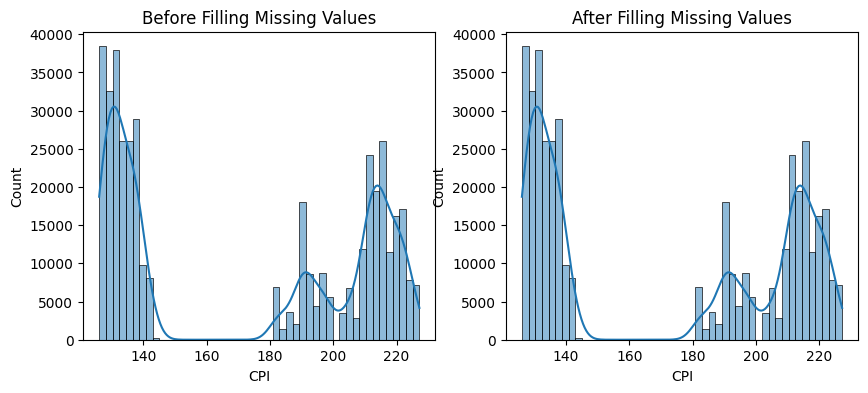

In [12]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

sns.histplot(data=data_train, x="CPI", kde=True, ax=ax1)
ax1.set_title("Before Filling Missing Values")

mean_cpi = data_train['CPI'].mean(skipna=True)
data_train['CPI'].fillna(mean_cpi, inplace=True)

sns.histplot(data=data_train, x="CPI", kde=True, ax=ax2)
ax2.set_title("After Filling Missing Values")

plt.show()


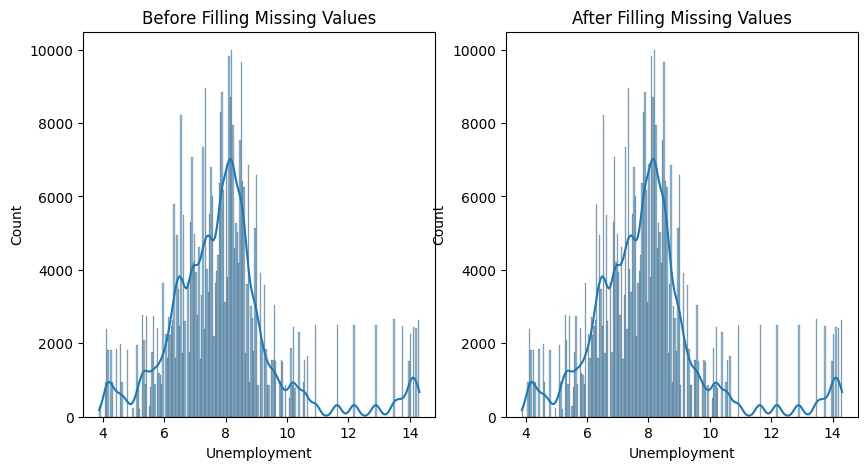

In [13]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

sns.histplot(data=data_train, x="Unemployment", kde=True, ax=ax1)
ax1.set_title("Before Filling Missing Values")

mean_cpi = data_train['Unemployment'].median(skipna=True)
data_train['CPI'].fillna(mean_cpi, inplace=True)

sns.histplot(data=data_train, x="Unemployment", kde=True, ax=ax2)
ax2.set_title("After Filling Missing Values")

plt.show()


In [14]:
data_train.fillna(0, inplace = True)
data_test['CPI'].fillna(data_test['CPI'].mean(), inplace = True)
data_test['Unemployment'].fillna(data_test['Unemployment'].mean(), inplace = True)
data_test.fillna(0, inplace = True)

In [15]:
data_train['IsHoliday'] = data_train['IsHoliday'].apply(lambda x: 1 if x == True else 0)
data_test['IsHoliday'] = data_test['IsHoliday'].apply(lambda x: 1 if x == True else 0)

In [16]:
data_train['Type'] = data_train['Type'].apply(lambda x: 1 if x == 'A' else (2 if x == 'B' else 3))
data_test['Type'] = data_test['Type'].apply(lambda x: 1 if x == 'A' else (2 if x == 'B' else 3))

In [17]:
data_train

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Year,Month,Week,Day
0,1,1,2010-02-05,24924.50,0,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,1,151315,2010,2,5,5
1,1,1,2010-02-12,46039.49,1,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106,1,151315,2010,2,6,12
2,1,1,2010-02-19,41595.55,0,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106,1,151315,2010,2,7,19
3,1,1,2010-02-26,19403.54,0,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106,1,151315,2010,2,8,26
4,1,1,2010-03-05,21827.90,0,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106,1,151315,2010,3,9,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,0,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,2,118221,2012,9,39,28
421566,45,98,2012-10-05,628.10,0,64.89,3.985,5046.74,0.00,18.82,2253.43,2340.01,192.170412,8.667,2,118221,2012,10,40,5
421567,45,98,2012-10-12,1061.02,0,54.47,4.000,1956.28,0.00,7.89,599.32,3990.54,192.327265,8.667,2,118221,2012,10,41,12
421568,45,98,2012-10-19,760.01,0,56.47,3.969,2004.02,0.00,3.18,437.73,1537.49,192.330854,8.667,2,118221,2012,10,42,19


In [18]:
data_test

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Year,Month,Week,Day
0,1,1,2012-11-02,0,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573000,1,151315,2012,11,44,2
1,1,1,2012-11-09,0,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573000,1,151315,2012,11,45,9
2,1,1,2012-11-16,0,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573000,1,151315,2012,11,46,16
3,1,1,2012-11-23,1,56.23,3.211,883.59,4.17,74910.32,209.91,303.32,223.561947,6.573000,1,151315,2012,11,47,23
4,1,1,2012-11-30,0,52.34,3.207,2460.03,0.00,3838.35,150.57,6966.34,223.610984,6.573000,1,151315,2012,11,48,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115059,45,98,2013-06-28,0,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,176.961347,6.868733,2,118221,2013,6,26,28
115060,45,98,2013-07-05,0,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,176.961347,6.868733,2,118221,2013,7,27,5
115061,45,98,2013-07-12,0,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,176.961347,6.868733,2,118221,2013,7,28,12
115062,45,98,2013-07-19,0,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,176.961347,6.868733,2,118221,2013,7,29,19


In [19]:
data_train.to_csv("Walmart_clean_train.csv")

In [20]:
data_test.to_csv("Walmart_clean_test.csv")

In [21]:
data_train.isna().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
Year            0
Month           0
Week            0
Day             0
dtype: int64